This experiment excludes outliers which are house with price greater than 1000

-------------------------------------------------------------------------------------------------------------------
# 1. Import library
-------------------------------------------------------------------------------------------------------------------

In [5]:
# Dataframe manipulation
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder

# Modelling Helpers:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Common function

In [6]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, ax4, y_pred, y_real, line_label, title):
    ax1.scatter(y_real, y_pred, color='blue',alpha=0.6,label=line_label)
    ax1.set_ylabel('Predicted Y') 
    ax1.set_xlabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,y_real - y_pred, color='green',marker='x',alpha=0.6,label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')    
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')
    
    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')
    
    stats.probplot(y_real - y_pred, plot=ax4)
    ax4.set_title('Probability of residual values')
    
    return ax1, ax2, ax3, ax4

-------------------------------------------------------------------------------------------------------------------
# 2. Import dataset
-------------------------------------------------------------------------------------------------------------------

In [7]:
train_df = pd.read_csv('preprocessed_train_exp02.csv')
test_df = pd.read_csv('preprocessed_test_exp02.csv')

train_df.head()

,id,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_total_listings_count,host_listings_count,longitude,number_of_reviews,availability_365,availability_90,availability_60,availability_30,maximum_nights,minimum_nights,extra_people,guests_included,accommodates,calculated_host_listings_count,latitude,price
0,5434392,0.032573,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,0.059819,0.071429,0.05,0.022727,0.000674,0.000674,0.653508,0.000000,0.000000,0.000000,0.000000,0.000000,5.234033e-07,0.003559,0.00000,0.000000,0.157895,0.000000,0.516919,75.0
1,7711381,0.032573,0.750,0.750,0.750,0.625,0.750,0.750,0.6625,0.054985,0.107143,0.05,0.022727,0.004717,0.004717,0.655717,0.069943,0.945205,0.844444,0.766667,0.533333,5.234033e-07,0.000890,0.12766,0.043478,0.052632,0.005530,0.582364,35.0
2,19707420,0.000000,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,0.059819,0.071429,0.05,0.022727,0.000674,0.000674,0.727140,0.000000,0.000000,0.000000,0.000000,0.000000,6.053597e-09,0.000890,0.00000,0.000000,0.000000,0.000000,0.753521,30.0
3,23352798,0.008143,0.875,1.000,1.000,1.000,1.000,0.875,0.9500,0.225378,0.071429,0.05,0.022727,0.000674,0.000674,0.510891,0.066163,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.052632,0.000000,0.483841,36.0
4,23821005,0.032573,1.000,0.875,0.875,0.875,0.875,0.750,0.8375,0.074924,0.071429,0.00,0.022727,0.002695,0.002695,0.317936,0.020794,0.010959,0.044444,0.066667,0.133333,5.234033e-07,0.000000,0.00000,0.000000,0.000000,0.001843,0.442923,38.0


In [17]:
print(train_df.shape)
print(test_df.shape)

(69170, 29)
(7686, 29)


-------------------------------------------------------------------------------------------------------------------
# 3. Construct X & y
-------------------------------------------------------------------------------------------------------------------

In [9]:
# capture the target
# y_train = pd.Series(np.log(train_df['price']))
# y_test = pd.Series(np.log(test_df['price']))
y_train = pd.Series(train_df['price'])
y_test = pd.Series(test_df['price'])

In [10]:
removed_list = ['id','price']
# load selected features
features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 
selected_features = [var for var in features if var not in removed_list]

In [11]:
# reduce the train and test set to the desired features
X_train = train_df[selected_features]
X_test = test_df[selected_features]

In [12]:
X_train.head()

,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_total_listings_count,host_listings_count,longitude,number_of_reviews,availability_365,availability_90,availability_60,availability_30,maximum_nights,minimum_nights,extra_people,guests_included,accommodates,calculated_host_listings_count,latitude
0,0.032573,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,0.059819,0.071429,0.05,0.022727,0.000674,0.000674,0.653508,0.000000,0.000000,0.000000,0.000000,0.000000,5.234033e-07,0.003559,0.00000,0.000000,0.157895,0.000000,0.516919
1,0.032573,0.750,0.750,0.750,0.625,0.750,0.750,0.6625,0.054985,0.107143,0.05,0.022727,0.004717,0.004717,0.655717,0.069943,0.945205,0.844444,0.766667,0.533333,5.234033e-07,0.000890,0.12766,0.043478,0.052632,0.005530,0.582364
2,0.000000,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,0.059819,0.071429,0.05,0.022727,0.000674,0.000674,0.727140,0.000000,0.000000,0.000000,0.000000,0.000000,6.053597e-09,0.000890,0.00000,0.000000,0.000000,0.000000,0.753521
3,0.008143,0.875,1.000,1.000,1.000,1.000,0.875,0.9500,0.225378,0.071429,0.05,0.022727,0.000674,0.000674,0.510891,0.066163,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.052632,0.000000,0.483841
4,0.032573,1.000,0.875,0.875,0.875,0.875,0.750,0.8375,0.074924,0.071429,0.00,0.022727,0.002695,0.002695,0.317936,0.020794,0.010959,0.044444,0.066667,0.133333,5.234033e-07,0.000000,0.00000,0.000000,0.000000,0.001843,0.442923


-------------------------------------------------------------------------------------------------------------------
# 4. Model Development
-------------------------------------------------------------------------------------------------------------------

## Multiple Linear Regression 1

### 1. Train model

In [19]:
import statsmodels.api as sm
X_train_LR = sm.add_constant(X_train)
X_test_LR = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_LR)
results = model.fit()

### 2. Result

#### model coefficients

In [14]:
# model.params

#### Summary of fitted model

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     2000.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:53:16   Log-Likelihood:            -3.9885e+05
No. Observations:               69170   AIC:                         7.978e+05
Df Residuals:                   69143   BIC:                         7.980e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -61.6517      4.283    -14.395      0.000     -70.046     -53.257
cleaning_fee                     262.6676      6.725     39.056      0.000     249.486     275.849
review_scores_value              -71.0944      4.676    -15.203      0.000     -80.260     -61.929
review_scores_location           117.6596      3.860     30.478      0.000     110.093     125.226
review_scores_checkin             -6.8658      4.731     -1.451      0.147     -16.139       2.407
review_scores_accuracy           -15.9884      4.848     -3.298      0.001     -25.490      -6.486
review_scores_communication      -25.9851      5.152     -5.044      0.000     -36.082     -15.888
review_scores_cleanliness         47.6406      3.664     13.002      0.000      40.459      54.822
review_scores_rating              48.0350      5.678      8.460      0.000      36.907      59.163
reviews_per_month                -44.1403      4.634     -9.526      0.000     -53.222     -35.058
bathrooms                        324.1368      8.389     38.640      0.000     307.695     340.579
beds                             -87.1919      8.684    -10.041      0.000    -104.212     -70.171
bedrooms                         460.3447     24.657     18.670      0.000     412.018     508.672
host_total_listings_count         79.2506      4.327     18.314      0.000      70.769      87.732
host_listings_count               79.2506      4.327     18.314      0.000      70.769      87.732
longitude                        -47.7068      2.571    -18.558      0.000     -52.745     -42.668
number_of_reviews                -58.7352      5.818    -10.095      0.000     -70.138     -47.332
availability_365                  13.4114      1.197     11.209      0.000      11.066      15.757
availability_90                   -0.0916      4.110     -0.022      0.982      -8.147       7.964
availability_60                    2.0271      5.248      0.386      0.699      -8.258      12.312
availability_30                   21.8476      2.335      9.355      0.000      17.270      26.425
maximum_nights                   -33.3518     51.206     -0.651      0.515    -133.716      67.012
minimum_nights                   -63.3750     23.894     -2.652      0.008    -110.208     -16.542
extra_people                     -23.9434      5.457     -4.388      0.000     -34.639     -13.248
guests_included                   45.0122      6.747      6.671      0.000      31.787      58.237
accommodates                     371.4157      5.743     64.670      0.000     360.159     382.672
calculated_host_listings_count   -88.5525      8.120    -10.906      0.000    -104.468     -72.637
latitude                           3.0153      2.486      1.213      0.225      -1.858       7.888
==============

### 3. Prediction

In [22]:
X_train_LR.head()

,const,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_total_listings_count,host_listings_count,longitude,number_of_reviews,availability_365,availability_90,availability_60,availability_30,maximum_nights,minimum_nights,extra_people,guests_included,accommodates,calculated_host_listings_count,latitude
0,1.0,0.032573,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,0.059819,0.071429,0.05,0.022727,0.000674,0.000674,0.653508,0.000000,0.000000,0.000000,0.000000,0.000000,5.234033e-07,0.003559,0.00000,0.000000,0.157895,0.000000,0.516919
1,1.0,0.032573,0.750,0.750,0.750,0.625,0.750,0.750,0.6625,0.054985,0.107143,0.05,0.022727,0.004717,0.004717,0.655717,0.069943,0.945205,0.844444,0.766667,0.533333,5.234033e-07,0.000890,0.12766,0.043478,0.052632,0.005530,0.582364
2,1.0,0.000000,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,0.059819,0.071429,0.05,0.022727,0.000674,0.000674,0.727140,0.000000,0.000000,0.000000,0.000000,0.000000,6.053597e-09,0.000890,0.00000,0.000000,0.000000,0.000000,0.753521
3,1.0,0.008143,0.875,1.000,1.000,1.000,1.000,0.875,0.9500,0.225378,0.071429,0.05,0.022727,0.000674,0.000674,0.510891,0.066163,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.052632,0.000000,0.483841
4,1.0,0.032573,1.000,0.875,0.875,0.875,0.875,0.750,0.8375,0.074924,0.071429,0.00,0.022727,0.002695,0.002695,0.317936,0.020794,0.010959,0.044444,0.066667,0.133333,5.234033e-07,0.000000,0.00000,0.000000,0.000000,0.001843,0.442923


In [21]:
pred_train = model.predict(X_train_LR)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

ValueError: shapes (69170,28) and (69170,28) not aligned: 28 (dim 1) != 69170 (dim 0)

### 4. Evaluate the model

#### Calculate rsquared

In [119]:
#model.rsquared

#### MSE and RMSE

In [130]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 24961.819673874805
linear train rmse: 157.9931000831201

linear test mse: 29768.475787710166
linear test rmse: 172.53543342661578


#### Visualize the predicted output and true label

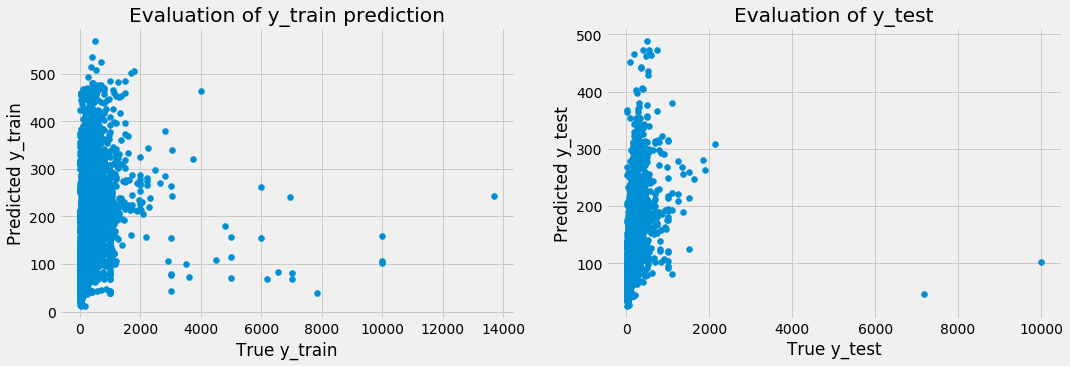

In [131]:
fig, axes = plt.subplots(1,2,figsize=(16,5))

axes[0].scatter(y_train, model.predict(X_train))
axes[0].set_xlabel('True y_train')
axes[0].set_ylabel('Predicted y_train')
axes[0].set_title('Evaluation of y_train prediction')

axes[1].scatter(y_test, model.predict(X_test))
axes[1].set_xlabel('True y_test')
axes[1].set_ylabel('Predicted y_test')
axes[1].set_title('Evaluation of y_test')

fig.show()

#### Distribution of the errors

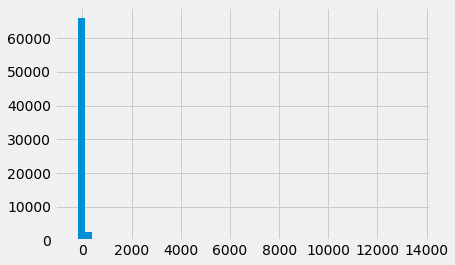

In [132]:
train_error = y_train - model.predict(X_train)
train_error.hist(bins=50)
fig.show()

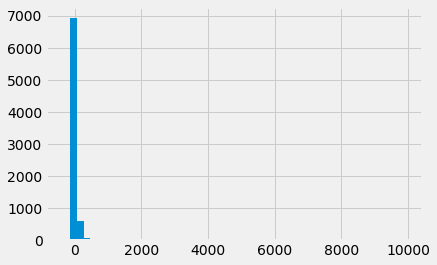

In [133]:
test_error = y_test - model.predict(X_test)
test_error.hist(bins=50)
fig.show()

### 5. Feature importance

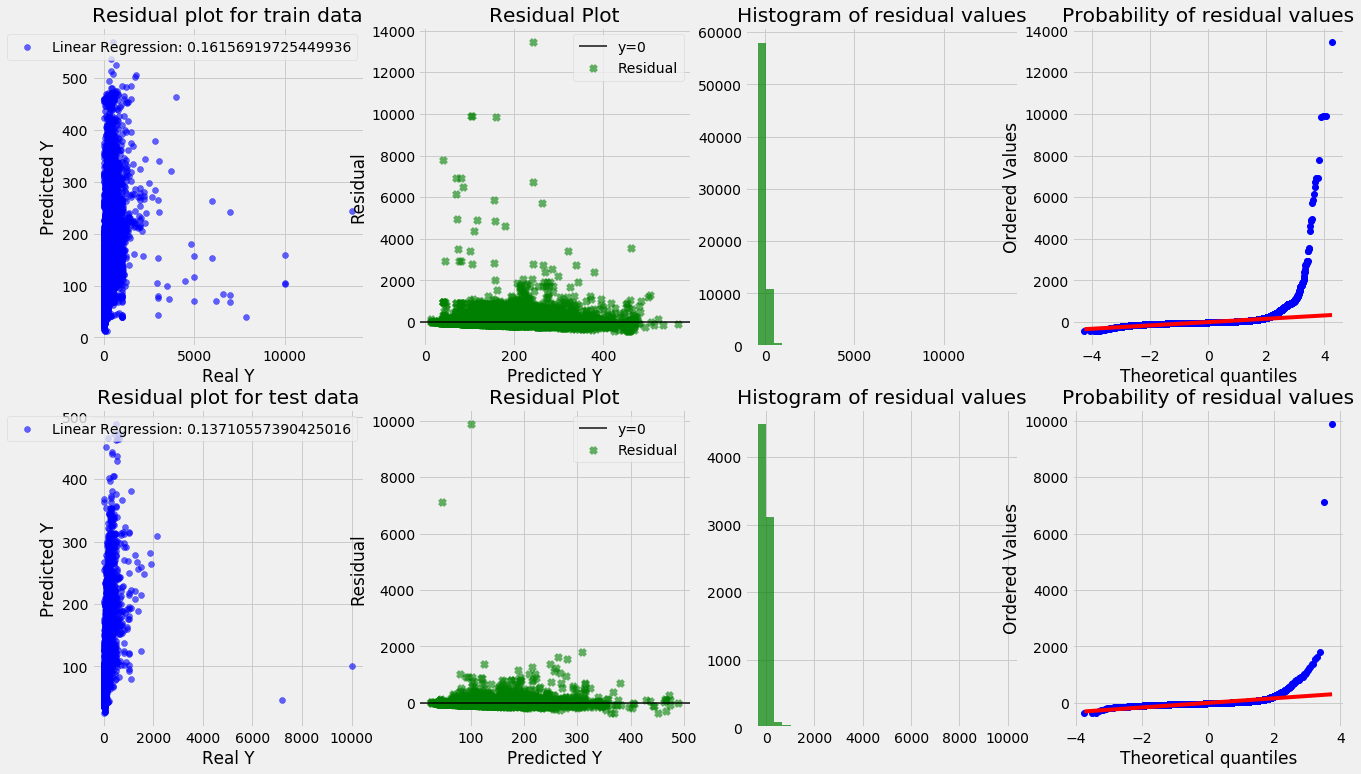

In [134]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

-------------------------------------------------------------------------------------------------------------------

## Multiple Linear Regression 2

### 1. Train model

In [23]:
import statsmodels.formula.api as smf
features = X_train.columns.values
formula = f'price ~ {"+".join(features)}'
train_df = pd.concat([X_train,y_train], axis = 1)
model = smf.ols(formula = formula,data=train_df).fit()

### 2. Result

#### Print the coefficient

In [24]:
model.params

Intercept                         -61.651680
cleaning_fee                      262.667586
review_scores_value               -71.094365
review_scores_location            117.659617
review_scores_checkin              -6.865772
review_scores_accuracy            -15.988415
review_scores_communication       -25.985106
review_scores_cleanliness          47.640602
review_scores_rating               48.035039
reviews_per_month                 -44.140315
bathrooms                         324.136824
beds                              -87.191854
bedrooms                          460.344719
host_total_listings_count          79.250626
host_listings_count                79.250626
longitude                         -47.706799
number_of_reviews                 -58.735185
availability_365                   13.411408
availability_90                    -0.091550
availability_60                     2.027062
availability_30                    21.847597
maximum_nights                    -33.351815
minimum_ni

#### Print the summary of fitted model

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     2000.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:56:49   Log-Likelihood:            -3.9885e+05
No. Observations:               69170   AIC:                         7.978e+05
Df Residuals:                   69143   BIC:                         7.980e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -61.6517      4.283    -14.395      0.000     -70.046     -53.257
cleaning_fee                     262.6676      6.725     39.056      0.000     249.486     275.849
review_scores_value              -71.0944      4.676    -15.203      0.000     -80.260     -61.929
review_scores_location           117.6596      3.860     30.478      0.000     110.093     125.226
review_scores_checkin             -6.8658      4.731     -1.451      0.147     -16.139       2.407
review_scores_accuracy           -15.9884      4.848     -3.298      0.001     -25.490      -6.486
review_scores_communication      -25.9851      5.152     -5.044      0.000     -36.082     -15.888
review_scores_cleanliness         47.6406      3.664     13.002      0.000      40.459      54.822
review_scores_rating              48.0350      5.678      8.460      0.000      36.907      59.163
reviews_per_month                -44.1403      4.634     -9.526      0.000     -53.222     -35.058
bathrooms                        324.1368      8.389     38.640      0.000     307.695     340.579
beds                             -87.1919      8.684    -10.041      0.000    -104.212     -70.171
bedrooms                         460.3447     24.657     18.670      0.000     412.018     508.672
host_total_listings_count         79.2506      4.327     18.314      0.000      70.769      87.732
host_listings_count               79.2506      4.327     18.314      0.000      70.769      87.732
longitude                        -47.7068      2.571    -18.558      0.000     -52.745     -42.668
number_of_reviews                -58.7352      5.818    -10.095      0.000     -70.138     -47.332
availability_365                  13.4114      1.197     11.209      0.000      11.066      15.757
availability_90                   -0.0916      4.110     -0.022      0.982      -8.147       7.964
availability_60                    2.0271      5.248      0.386      0.699      -8.258      12.312
availability_30                   21.8476      2.335      9.355      0.000      17.270      26.425
maximum_nights                   -33.3518     51.206     -0.651      0.515    -133.716      67.012
minimum_nights                   -63.3750     23.894     -2.652      0.008    -110.208     -16.542
extra_people                     -23.9434      5.457     -4.388      0.000     -34.639     -13.248
guests_included                   45.0122      6.747      6.671      0.000      31.787      58.237
accommodates                     371.4157      5.743     64.670      0.000     360.159     382.672
calculated_host_listings_count   -88.5525      8.120    -10.906      0.000    -104.468     -72.637
latitude                           3.0153      2.486      1.213      0.225      -1.858       7.888
==============

### 3. Prediction

In [26]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [95.82859730912554, 63.97690751437148, 25.997893286304986, 46.58092500505171, 30.69681836102177]
Train true label:  [75.0, 35.0, 30.0, 36.0, 38.0]

Test prediction:  [184.98986097959244, 252.25966790394784, 101.36523334523194, 57.4120800003563, 34.53550284222938]
Test true label:  [140.0, 250.0, 75.0, 37.0, 29.0]

Average house price:  80.0


### 4. Evaluate the model

#### Calculate r-square

In [27]:
model.rsquared

0.4292308595537353

#### MSE and RMSE

In [28]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 5971.272497553991
linear train rmse: 77.27400919813849

linear test mse: 6020.225085908228
linear test rmse: 77.59010945931335


#### Visualize the predicted output and true label

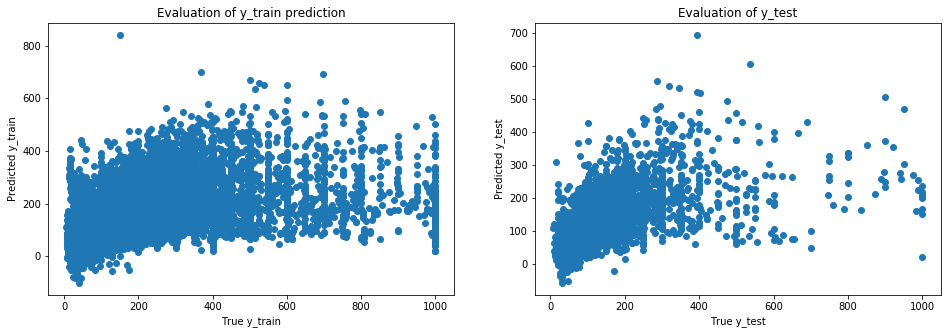

In [29]:
fig, axes = plt.subplots(1,2,figsize=(16,5))

axes[0].scatter(y_train, model.predict(X_train))
axes[0].set_xlabel('True y_train')
axes[0].set_ylabel('Predicted y_train')
axes[0].set_title('Evaluation of y_train prediction')

axes[1].scatter(y_test, model.predict(X_test))
axes[1].set_xlabel('True y_test')
axes[1].set_ylabel('Predicted y_test')
axes[1].set_title('Evaluation of y_test')

fig.show()

=> outliers affects the prediction's result, should remove outliers

#### Distribution of errors 

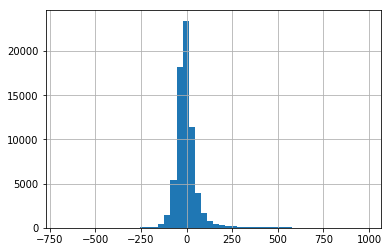

In [30]:
train_error = y_train - model.predict(X_train)
train_error.hist(bins=50)
fig.show()

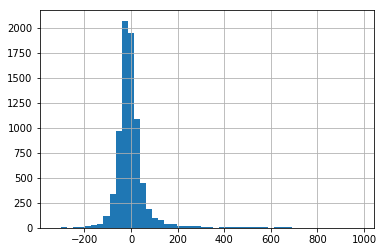

In [31]:
test_error = y_test - model.predict(X_test)
test_error.hist(bins=50)
fig.show()

In [36]:
model.predict(X_train)[model.predict(X_train) < 0]

202     -15.779739
497     -30.068435
787     -12.340815
1203     -0.778431
1299     -6.312444
1455     -6.684129
1614     -3.297242
1670    -36.471302
2062    -37.914170
2449    -12.178319
2467    -14.946677
2822    -27.587831
2928     -0.886192
2959     -3.556657
3246    -18.736841
3324     -6.585255
3589     -1.582296
3666    -32.762755
4007     -5.255986
4095    -13.485630
4875    -39.250987
4886     -2.045954
4904    -41.407231
5648     -8.249714
5975     -3.643229
6434    -13.071216
6803     -2.922639
7120     -8.941302
7200    -14.526374
7460     -3.902643
7566    -18.020301
8599     -6.109059
8945     -4.131625
9616     -0.632267
9930    -19.327922
9989    -11.443676
10921   -76.464579
11220   -34.617491
11461    -5.137485
11482    -4.615209
12333   -20.161502
12525    -7.665818
12578   -14.244600
12773   -10.854504
12937    -1.247194
13216    -3.052093
13342   -33.490187
14631    -1.070034
16126   -10.913316
16513   -28.993917
16606    -2.423491
16615    -3.078911
16695   -18.

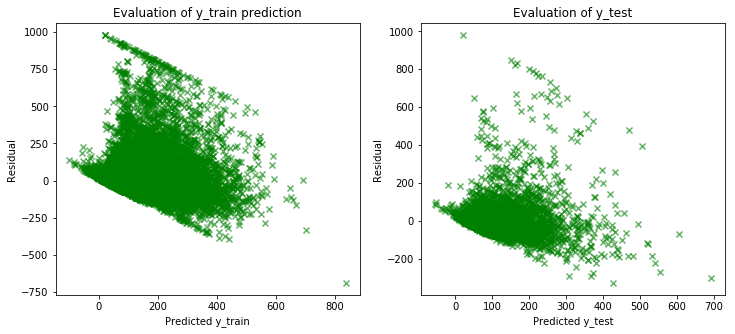

In [38]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

axes[0].scatter(pred_train,y_train - pred_train, color='green',marker='x',alpha=0.6,label='Residual')
axes[0].set_xlabel('Predicted y_train')
axes[0].set_ylabel('Residual')
axes[0].set_title('Evaluation of y_train prediction')

axes[1].scatter(pred_test,y_test - pred_test, color='green',marker='x',alpha=0.6,label='Residual')
axes[1].set_xlabel('Predicted y_test')
axes[1].set_ylabel('Residual')
axes[1].set_title('Evaluation of y_test')

fig.show()

### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

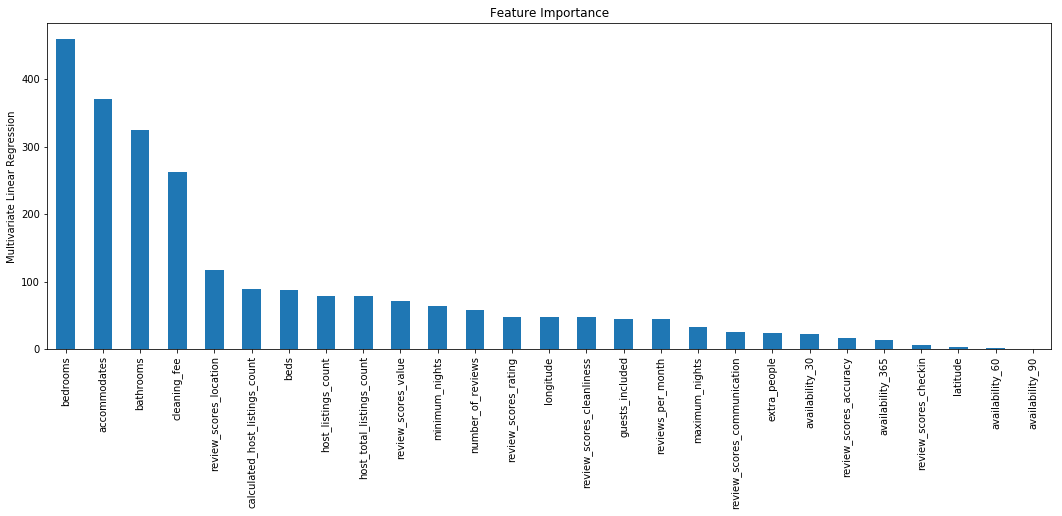

In [39]:
feature_importance = pd.Series(np.abs(model.params[1:]))
feature_importance.index = selected_features
feature_importance.sort_values(inplace=True,ascending=False)
feature_importance.plot.bar(figsize=(18,6))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')

-------------------------------------------------------------------------------------------------------------------

## Lasso regression model

### 1. Train the model

In [40]:
model = Lasso() # remember to set the random_state / seed
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### 2. Result

#### Print the coefficient

In [41]:
model.coef_

array([ 9.35774032e+01,  0.00000000e+00,  8.61447430e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.25857359e+01,  1.70975877e-14, -0.00000000e+00, -0.00000000e+00,
        5.87785869e+00,  0.00000000e+00,  0.00000000e+00,  1.95236390e+01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.32533626e+02,  0.00000000e+00, -0.00000000e+00])

#### Print the summary

In [61]:
# model.summary()

### 3. Prediction

In [42]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [115.7389277096373, 84.27688754989742, 44.3960207918242, 67.92297944097314, 49.16142317375496]
Train true label:  [75.0, 35.0, 30.0, 36.0, 38.0]

Test prediction:  [142.73712605573547, 175.8990206429363, 118.50163374916733, 71.13561615988952, 48.62266906271622]
Test true label:  [140.0, 250.0, 75.0, 37.0, 29.0]

Average house price:  80.0


### 4. Evaluate the model

#### R-squared

In [43]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.3582
Test R-squared: 0.3403


#### MSE and RMSE

In [44]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 6714.648718850155
linear train rmse: 81.94296015430584

linear test mse: 6732.583170343207
linear test rmse: 82.05231971335854


#### Visualize the predicted output and true label

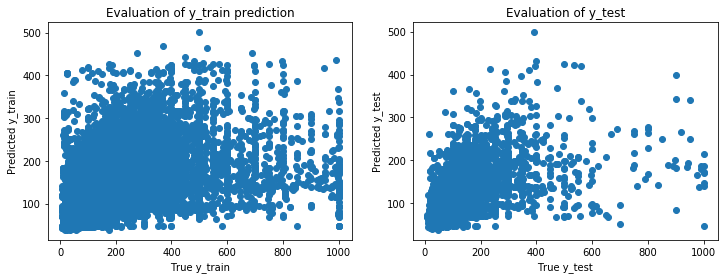

In [45]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].scatter(y_train, model.predict(X_train))
axes[0].set_xlabel('True y_train')
axes[0].set_ylabel('Predicted y_train')
axes[0].set_title('Evaluation of y_train prediction')

axes[1].scatter(y_test, model.predict(X_test))
axes[1].set_xlabel('True y_test')
axes[1].set_ylabel('Predicted y_test')
axes[1].set_title('Evaluation of y_test')

fig.show()

=> Outliers affect the model prediction

#### Distribution of the errors

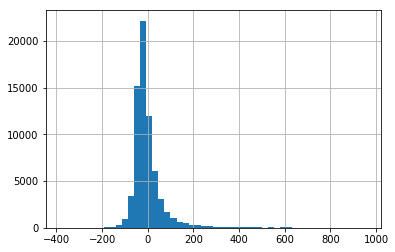

In [46]:
train_error = y_train - model.predict(X_train)
train_error.hist(bins=50)
fig.show()

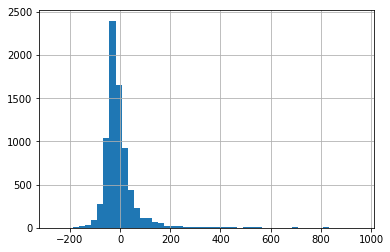

In [47]:
test_error = y_test - model.predict(X_test)
test_error.hist(bins=50)
fig.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

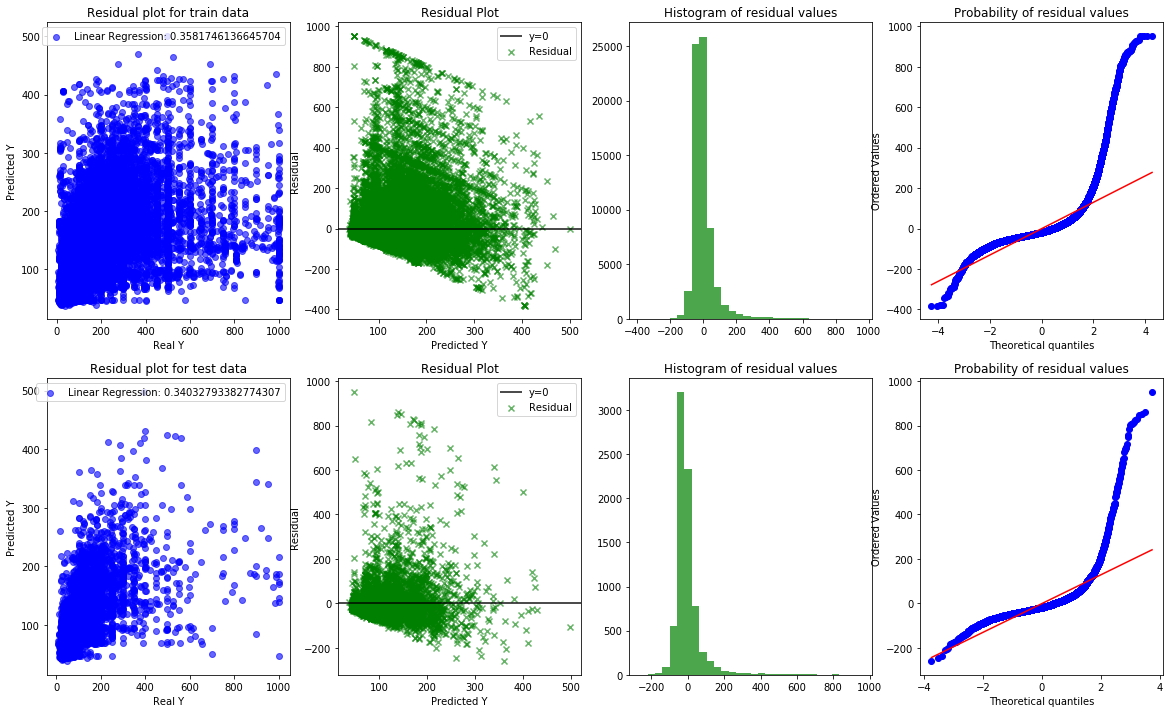

In [48]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

### 5. Feature importance

Text(0.5, 1.0, 'Feature Importance')

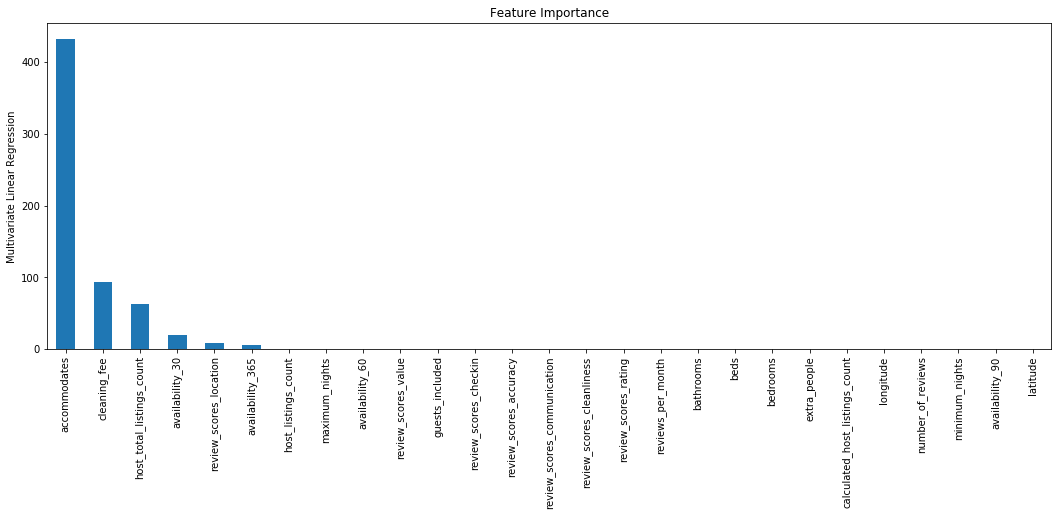

In [49]:
feature_importance = pd.Series(np.abs(model.coef_))
feature_importance.index = selected_features
feature_importance.sort_values(inplace=True,ascending=False)
feature_importance.plot.bar(figsize=(18,6))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')

In [50]:
feature_importance

accommodates                      4.325336e+02
cleaning_fee                      9.357740e+01
host_total_listings_count         6.258574e+01
availability_30                   1.952364e+01
review_scores_location            8.614474e+00
availability_365                  5.877859e+00
host_listings_count               1.709759e-14
maximum_nights                    0.000000e+00
availability_60                   0.000000e+00
review_scores_value               0.000000e+00
guests_included                   0.000000e+00
review_scores_checkin             0.000000e+00
review_scores_accuracy            0.000000e+00
review_scores_communication       0.000000e+00
review_scores_cleanliness         0.000000e+00
review_scores_rating              0.000000e+00
reviews_per_month                 0.000000e+00
bathrooms                         0.000000e+00
beds                              0.000000e+00
bedrooms                          0.000000e+00
extra_people                      0.000000e+00
calculated_ho

-------------------------------------------------------------------------------------------------------------------

## Linear Regression 3 

### 1. Train the model

In [51]:
# Choose a class of model
from sklearn.linear_model import LinearRegression
# Choose model hyperparameters
model = LinearRegression(fit_intercept = True)
# Fit the model to the train dataset
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 2. Result

In [52]:
model.coef_

array([ 2.61702177e+02, -7.11448066e+01,  1.17652016e+02, -6.84908295e+00,
       -1.59488176e+01, -2.59621492e+01,  4.76082210e+01,  4.80470868e+01,
       -4.41391829e+01,  3.24145440e+02, -8.70954826e+01,  4.60552747e+02,
       -1.06011978e+14,  1.06011978e+14, -4.77058986e+01, -5.87288298e+01,
        1.34101076e+01, -1.01774186e-01,  2.03957438e+00,  2.18445213e+01,
       -3.33921132e+01, -6.33608708e+01, -2.39661477e+01,  4.50483438e+01,
        3.71383379e+02, -8.85537128e+01,  3.01112093e+00])

### 3. Prediction

In [53]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [95.82454083382234, 63.971300698396774, 26.029416300078623, 46.61416002754629, 30.69234329308452]
Train true label:  [75.0, 35.0, 30.0, 36.0, 38.0]

Test prediction:  [184.94193918153675, 252.16002002009407, 101.37147394055768, 57.41980050612894, 34.559357386946644]
Test true label:  [140.0, 250.0, 75.0, 37.0, 29.0]

Average house price:  80.0


### 4. Evaluate the model

#### R-squared

In [54]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.4292
Test R-squared: 0.4101


In [55]:
import sklearn as sk
print('Train R-squared: %.4f' % sk.metrics.r2_score(y_train, pred_train))
print('Test R-squared: %.4f' % sk.metrics.r2_score(y_test, pred_test))

Train R-squared: 0.4292
Test R-squared: 0.4101


#### MSE and RMSE

In [56]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 5971.2743538704735
linear train rmse: 77.27402120939789

linear test mse: 6020.542485069657
linear test rmse: 77.59215479073679


#### Residual plot

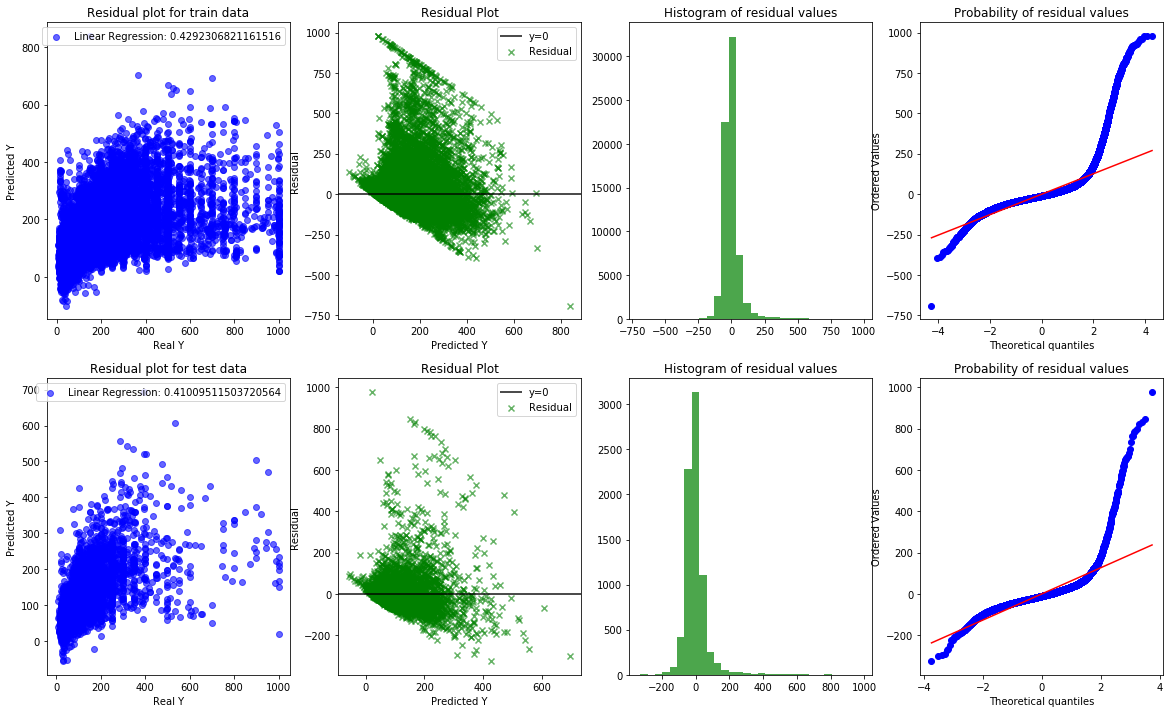

In [57]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

### 5. Feature importance

In [58]:
feature_importance = pd.Series(model.coef_)
feature_importance.index = selected_features
feature_importance

cleaning_fee                      2.617022e+02
review_scores_value              -7.114481e+01
review_scores_location            1.176520e+02
review_scores_checkin            -6.849083e+00
review_scores_accuracy           -1.594882e+01
review_scores_communication      -2.596215e+01
review_scores_cleanliness         4.760822e+01
review_scores_rating              4.804709e+01
reviews_per_month                -4.413918e+01
bathrooms                         3.241454e+02
beds                             -8.709548e+01
bedrooms                          4.605527e+02
host_total_listings_count        -1.060120e+14
host_listings_count               1.060120e+14
longitude                        -4.770590e+01
number_of_reviews                -5.872883e+01
availability_365                  1.341011e+01
availability_90                  -1.017742e-01
availability_60                   2.039574e+00
availability_30                   2.184452e+01
maximum_nights                   -3.339211e+01
minimum_night

Text(0.5, 1.0, 'Feature Importance')

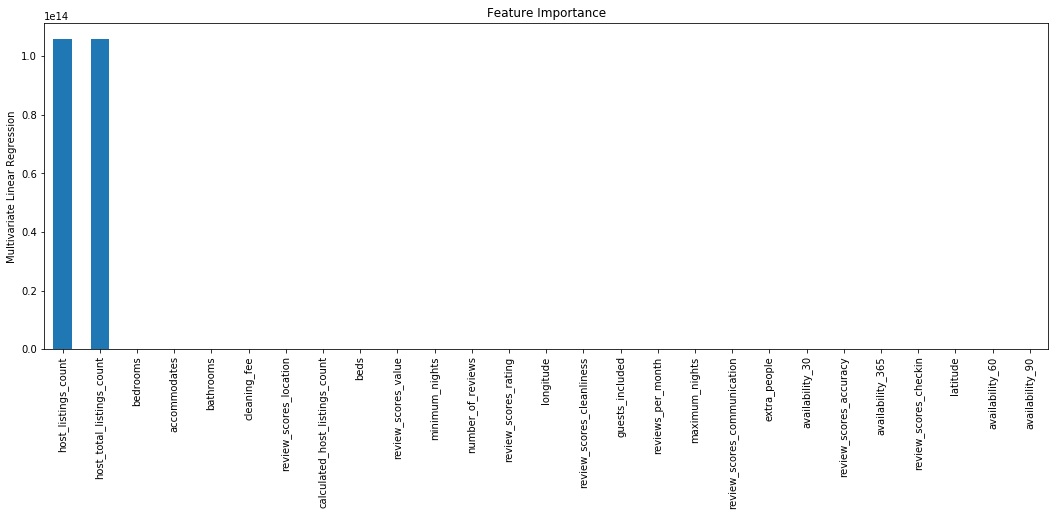

In [59]:
feature_importance = pd.Series(np.abs(model.coef_))
feature_importance.index = selected_features
feature_importance.sort_values(inplace=True,ascending=False)
feature_importance.plot.bar(figsize=(18,6))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')

In [60]:
# Get numerical feature importance
feature_importance = list(np.abs(model.coef_))
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

host_listings_count                                Importance: 106011978286378.88
host_total_listings_count                          Importance: 106011978286219.38
bedrooms                                           Importance: 460.55
accommodates                                       Importance: 371.38
bathrooms                                          Importance: 324.15
cleaning_fee                                       Importance: 261.7
review_scores_location                             Importance: 117.65
calculated_host_listings_count                     Importance: 88.55
beds                                               Importance: 87.1
review_scores_value                                Importance: 71.14
minimum_nights                                     Importance: 63.36
number_of_reviews                                  Importance: 58.73
review_scores_rating                               Importance: 48.05
longitude                                          Importance: 47.71
revie

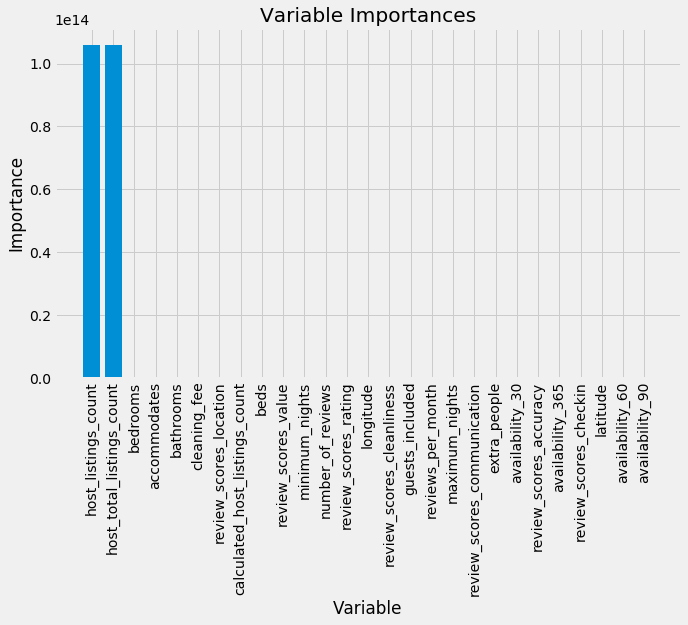

In [61]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,6))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

-------------------------------------------------------------------------------------------------------------------

## Linear Regression Cross Validation

### 1. Train model

In [62]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 10)

### 2. Model evaluation

In [63]:
rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
print( "Average rmse score: ", np.round( np.mean( rmse ), 2 ) )

Average r2 score:  0.43
Average rmse score:  77.32


-------------------------------------------------------------------------------------------------------------------

## Gradient Boosting Tree

### 1. Train model

In [64]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

### 2. Result

In [65]:
#Default parameters our model used
model.get_params()   

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 3. Prediction

In [66]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [98.78283919696888, 52.56863131052692, 29.548315304936633, 57.82737927408039, 27.097839862030817]
Train true label:  [75.0, 35.0, 30.0, 36.0, 38.0]

Test prediction:  [174.94426738676896, 336.7267450187587, 90.02413913672993, 72.51434103351819, 31.90408738349499]
Test true label:  [140.0, 250.0, 75.0, 37.0, 29.0]

Average house price:  80.0


### 4. Model Evaluation

#### R-squared

In [67]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.6327
Test R-squared: 0.5963


#### MSE and RMSE

In [68]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 3842.188861965724
linear train rmse: 61.98539232727114

linear test mse: 4120.19183804832
linear test rmse: 64.1887204892598


#### Residual plot

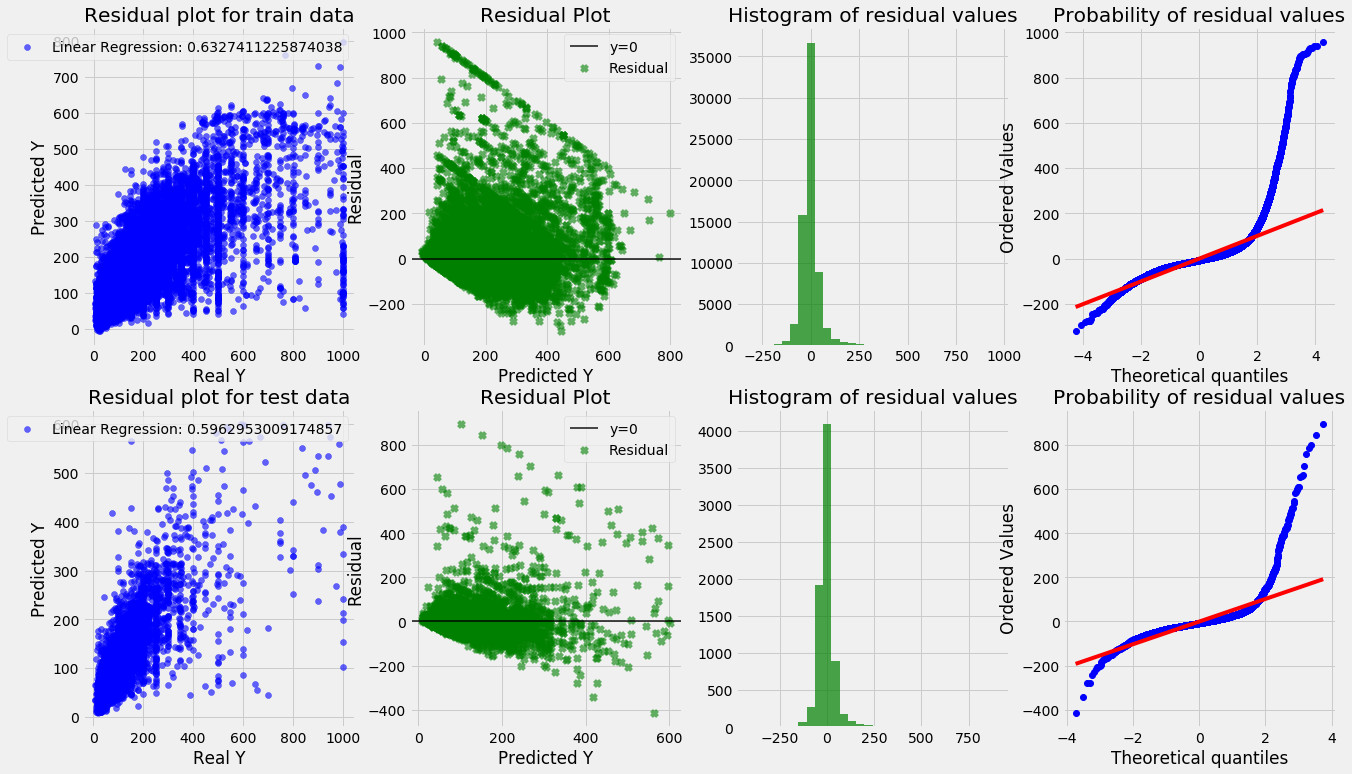

In [69]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

### 5. Feature Importance

In [70]:
# Get numerical feature importance
feature_importance = list(model.feature_importances_)
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

bedrooms                                           Importance: 0.23
accommodates                                       Importance: 0.22
bathrooms                                          Importance: 0.14
cleaning_fee                                       Importance: 0.11
host_total_listings_count                          Importance: 0.05
host_listings_count                                Importance: 0.05
longitude                                          Importance: 0.05
latitude                                           Importance: 0.04
calculated_host_listings_count                     Importance: 0.02
review_scores_location                             Importance: 0.01
number_of_reviews                                  Importance: 0.01
availability_365                                   Importance: 0.01
availability_90                                    Importance: 0.01
availability_30                                    Importance: 0.01
extra_people                                    

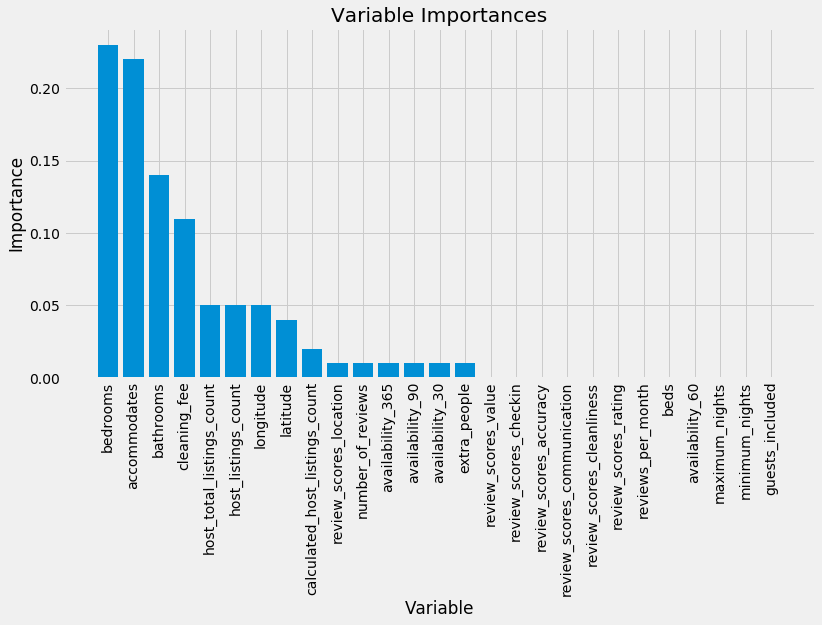

In [71]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### 6. Cross validation

In [72]:
# Cross Validation
model = GradientBoostingRegressor()
cv_scores = cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(model,X_train, y_train,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [0.62309096 0.60583654 0.61782074 0.60275013 0.63086977 0.6071763
 0.62256406 0.61720941 0.62538349 0.62761876]
Average R2 score:  0.62
Average RMSE score:  63.2


### 7. Tuning model

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [5, 20],
    'min_samples_leaf': [3, 20],
    'min_samples_split': [8, 20],
    'n_estimators': [5, 50]
}
# Create a based model
model = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, y_train)  
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.5min finished


{'max_depth': 10,
 'max_features': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

In [76]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    # Retrain with the best parameters
    # model = GradientBoostingRegressor(grid_search.best_params_,  learning_rate = learning_rate,random_state = 42)
    model = GradientBoostingRegressor(n_estimators=50, learning_rate = learning_rate, max_features=20, max_depth = 10, min_samples_leaf = 3, min_samples_split = 8,random_state = 42)
    model.fit(X_train, y_train)    
    print('Learning rate: ',learning_rate)
    # Predicting label
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Train R-squared: %.4f' % train_score)
    print('Test R-squared: %.4f' % test_score)

Learning rate:  0.05
Train R-squared: 0.7917
Test R-squared: 0.6628
Learning rate:  0.1
Train R-squared: 0.8504
Test R-squared: 0.6867
Learning rate:  0.25
Train R-squared: 0.8948
Test R-squared: 0.6776
Learning rate:  0.5
Train R-squared: 0.9153
Test R-squared: 0.6086
Learning rate:  0.75
Train R-squared: 0.9300
Test R-squared: 0.5620
Learning rate:  1
Train R-squared: 0.9331
Test R-squared: 0.4208


In [78]:
# Retrain with the best parameters 
model = GradientBoostingRegressor(n_estimators=50, max_features=20, max_depth = 10, min_samples_leaf = 3, min_samples_split = 8, learning_rate = 0.05,random_state = 42)
model.fit(X_train,y_train)
# Predicting label
pred_train = model.predict(X_train)
pred_test = model.predict(X_test) 

In [79]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.7917
Test R-squared: 0.6628


In [80]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 2179.093606037714
linear train rmse: 46.68076269768644

linear test mse: 3441.4288856650055
linear test rmse: 58.66369307898204


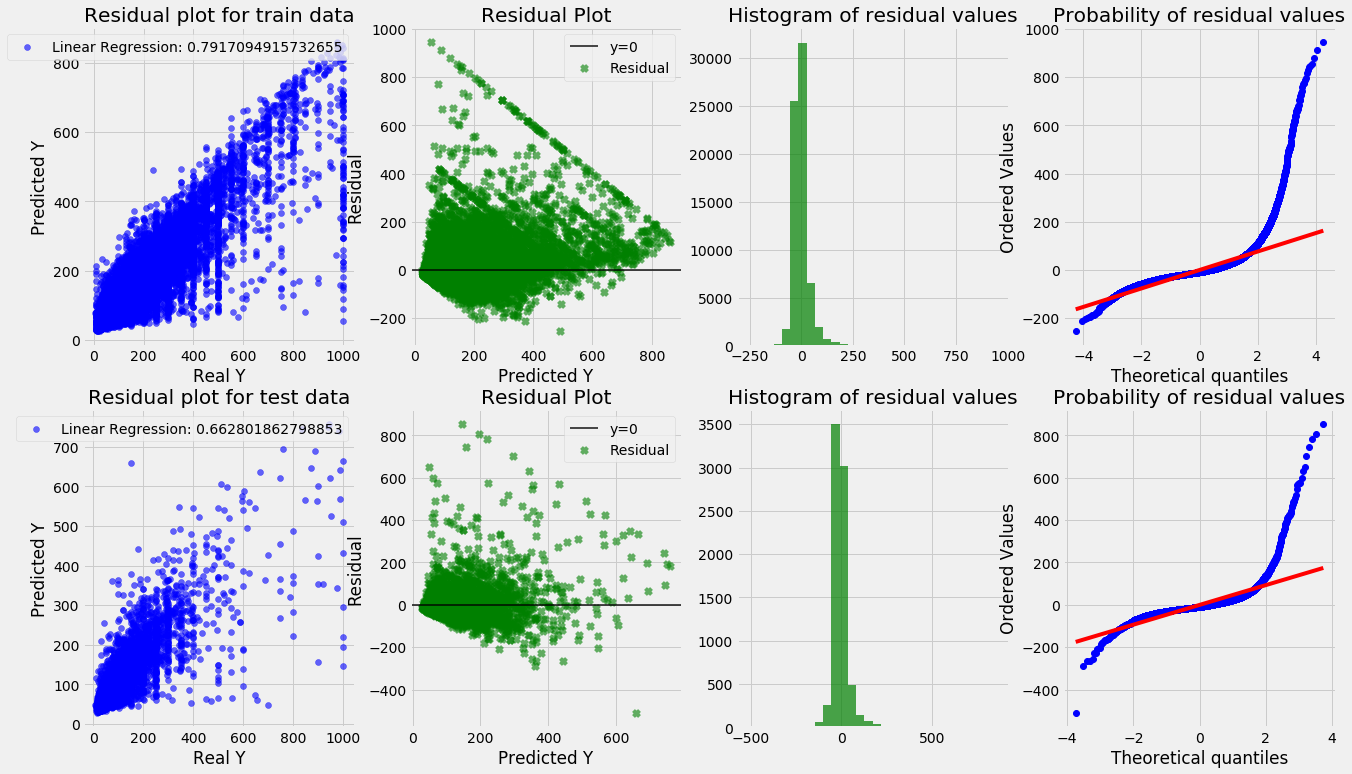

In [81]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

In [84]:
feature_importance = pd.Series(model.feature_importances_)
feature_importance.index = selected_features
feature_importance

cleaning_fee                      0.094909
review_scores_value               0.000888
review_scores_location            0.007196
review_scores_checkin             0.000691
review_scores_accuracy            0.000729
review_scores_communication       0.000877
review_scores_cleanliness         0.001364
review_scores_rating              0.005886
reviews_per_month                 0.007984
bathrooms                         0.110536
beds                              0.016396
bedrooms                          0.290815
host_total_listings_count         0.055647
host_listings_count               0.051872
longitude                         0.067110
number_of_reviews                 0.021374
availability_365                  0.020392
availability_90                   0.014962
availability_60                   0.010545
availability_30                   0.013795
maximum_nights                    0.001445
minimum_nights                    0.009699
extra_people                      0.021134
guests_incl

Text(0.5, 1.0, 'Feature Importance')

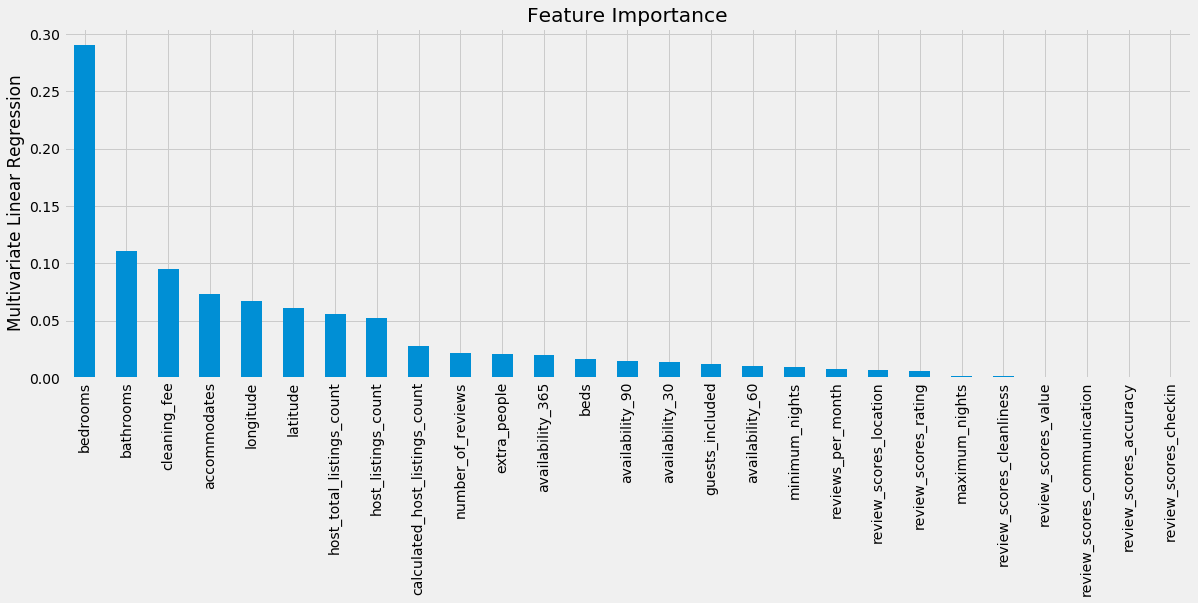

In [85]:
feature_importance = pd.Series(np.abs(model.feature_importances_))
feature_importance.index = selected_features
feature_importance.sort_values(inplace=True,ascending=False)
feature_importance.plot.bar(figsize=(18,6))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')

## Random Forest

### 1. Train model

In [86]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### 2. Result

In [87]:
#Default parameters our model used
model.get_params() 

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Prediction

In [88]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [74.6, 34.9, 28.4, 39.8, 34.5]
Train true label:  [75.0, 35.0, 30.0, 36.0, 38.0]

Test prediction:  [147.0, 278.2, 81.7, 59.6, 37.3]
Test true label:  [140.0, 250.0, 75.0, 37.0, 29.0]

Average house price:  80.0


### 4. Model Evaluation

#### R-squared

In [89]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.9337
Test R-squared: 0.6388


#### MSE, RMSE

In [90]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 693.956402486627
linear train rmse: 26.34305226215495

linear test mse: 3686.212844132189
linear test rmse: 60.71418980874396


#### Residual plot

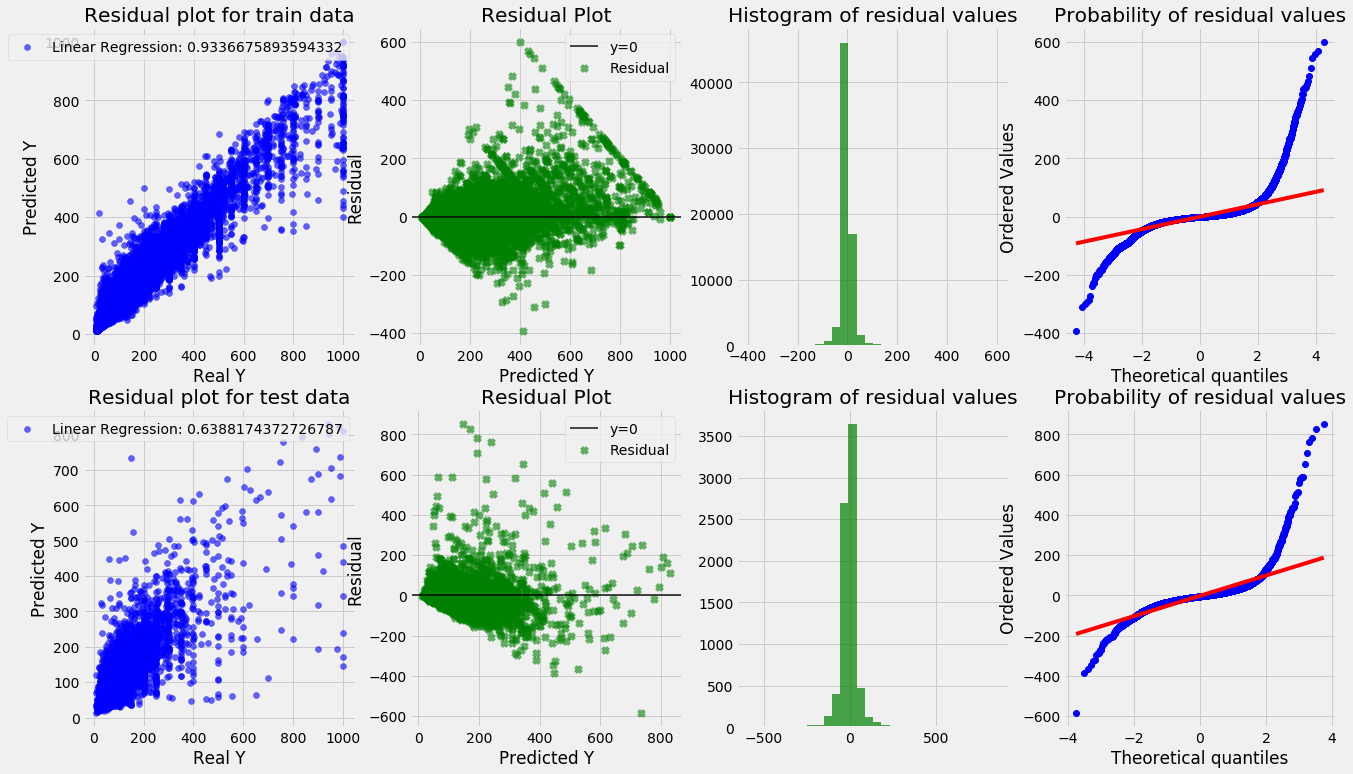

In [91]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

### 5. Feature Importance 

In [92]:
feature_importance = pd.Series(model.feature_importances_)
feature_importance.index = selected_features
feature_importance

cleaning_fee                      0.081725
review_scores_value               0.002594
review_scores_location            0.007600
review_scores_checkin             0.002434
review_scores_accuracy            0.002527
review_scores_communication       0.002044
review_scores_cleanliness         0.003696
review_scores_rating              0.007897
reviews_per_month                 0.017232
bathrooms                         0.105820
beds                              0.013998
bedrooms                          0.259359
host_total_listings_count         0.042158
host_listings_count               0.040517
longitude                         0.083583
number_of_reviews                 0.025584
availability_365                  0.031605
availability_90                   0.020252
availability_60                   0.014862
availability_30                   0.018838
maximum_nights                    0.004343
minimum_nights                    0.019408
extra_people                      0.021984
guests_incl

Text(0.5, 1.0, 'Feature Importance')

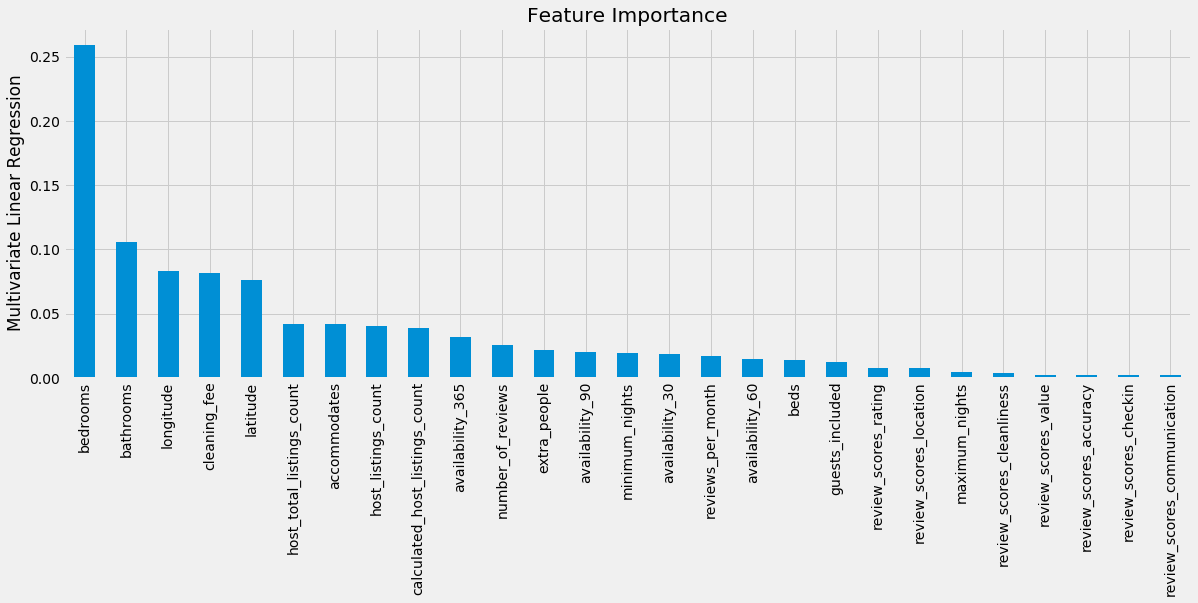

In [93]:
feature_importance = pd.Series(np.abs(model.feature_importances_))
feature_importance.index = selected_features
feature_importance.sort_values(inplace=True,ascending=False)
feature_importance.plot.bar(figsize=(18,6))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')

In [94]:
# Get numerical feature importance
feature_importance = list(model.feature_importances_)
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

bedrooms                                           Importance: 0.26
bathrooms                                          Importance: 0.11
cleaning_fee                                       Importance: 0.08
longitude                                          Importance: 0.08
latitude                                           Importance: 0.08
host_total_listings_count                          Importance: 0.04
host_listings_count                                Importance: 0.04
accommodates                                       Importance: 0.04
calculated_host_listings_count                     Importance: 0.04
number_of_reviews                                  Importance: 0.03
availability_365                                   Importance: 0.03
reviews_per_month                                  Importance: 0.02
availability_90                                    Importance: 0.02
availability_30                                    Importance: 0.02
minimum_nights                                  

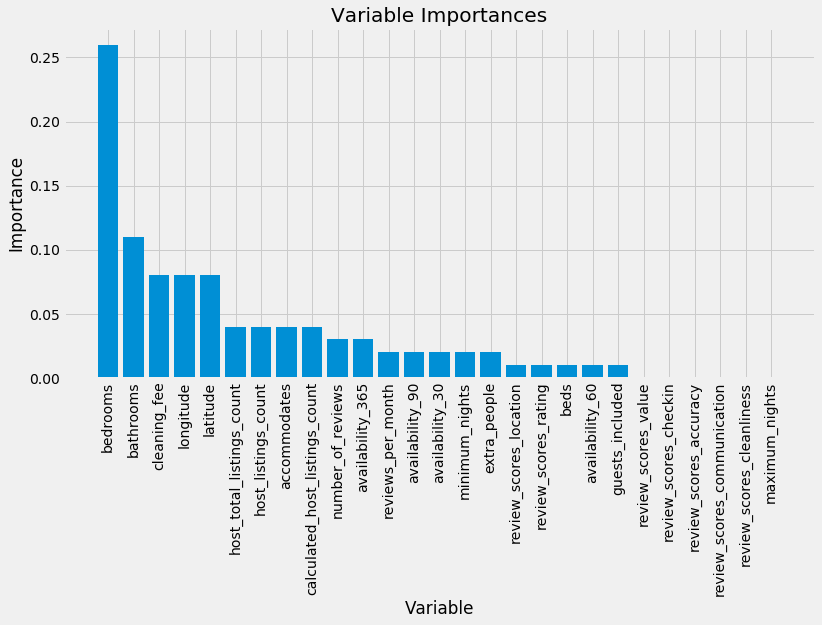

In [95]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### 6. Cross Validation

In [ ]:
# Cross Validation
model = RandomForestRegressor(n_estimators = 100,learning_rate=0.05, max_depth=3,max_features=3,min_samples_leaf=20,min_samples_split=2)
cv_scores = cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(model,X_train, y_train,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

### 7. Tuning model

In [97]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [5, 20],
    'min_samples_leaf': [3, 20],
    'min_samples_split': [8, 20],
    'n_estimators': [5, 50]
}
# Create a based model
model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, y_train)  
grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.5min finished


{'max_depth': 10,
 'max_features': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    # Retrain with the best parameters
    # model = RandomForestRegressor(grid_search.best_params_,  learning_rate = learning_rate,random_state = 42)
    model = RandomForestRegressor(n_estimators=100, learning_rate = learning_rate, max_features=10, max_depth = 10, min_samples_leaf = 3,min_samples_split = 8,random_state = 42)
    model.fit(X_train, y_train)    
    print('Learning rate: ',learning_rate)
    # Predicting label
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Train R-squared: %.4f' % train_score)
    print('Test R-squared: %.4f' % test_score)

In [99]:
# Retrain with the best parameters 
model = RandomForestRegressor(n_estimators=200, max_features=20, max_depth = 10,min_samples_leaf = 3,min_samples_split = 8,random_state = 42)
model.fit(X_train,y_train)
# Predicting label
pred_train = model.predict(X_train)
pred_test = model.predict(X_test) 

In [100]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.6989
Test R-squared: 0.6197


In [101]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 3150.0722665938247
linear train rmse: 56.12550459990382

linear test mse: 3881.2261873031016
linear test rmse: 62.299487857470396


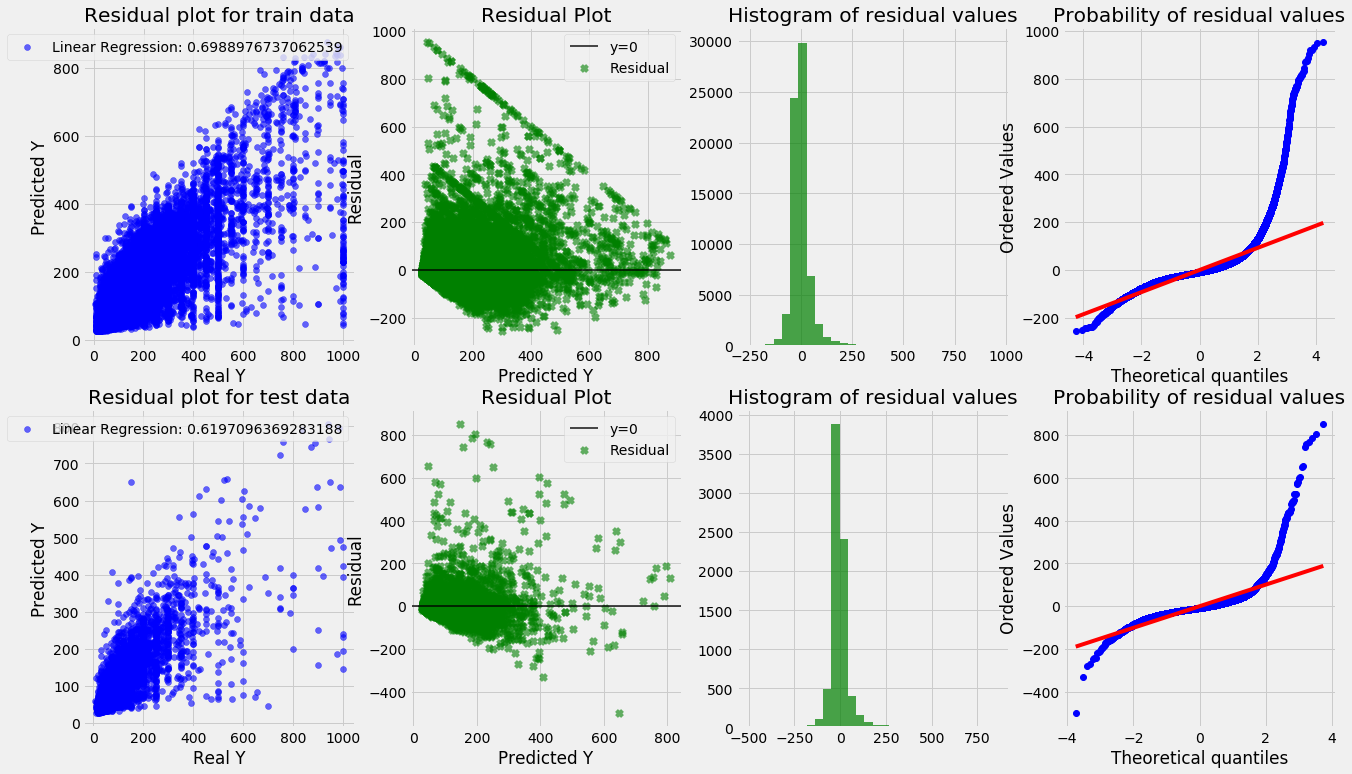

In [102]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

In [103]:
feature_importance = pd.Series(model.feature_importances_)
feature_importance.index = selected_features
feature_importance

cleaning_fee                      0.107006
review_scores_value               0.000720
review_scores_location            0.007140
review_scores_checkin             0.000417
review_scores_accuracy            0.000563
review_scores_communication       0.000509
review_scores_cleanliness         0.000609
review_scores_rating              0.003135
reviews_per_month                 0.005089
bathrooms                         0.142948
beds                              0.028458
bedrooms                          0.276460
host_total_listings_count         0.048528
host_listings_count               0.049338
longitude                         0.043256
number_of_reviews                 0.013531
availability_365                  0.015819
availability_90                   0.011998
availability_60                   0.010285
availability_30                   0.011511
maximum_nights                    0.000918
minimum_nights                    0.004721
extra_people                      0.014447
guests_incl

Text(0.5, 1.0, 'Feature Importance')

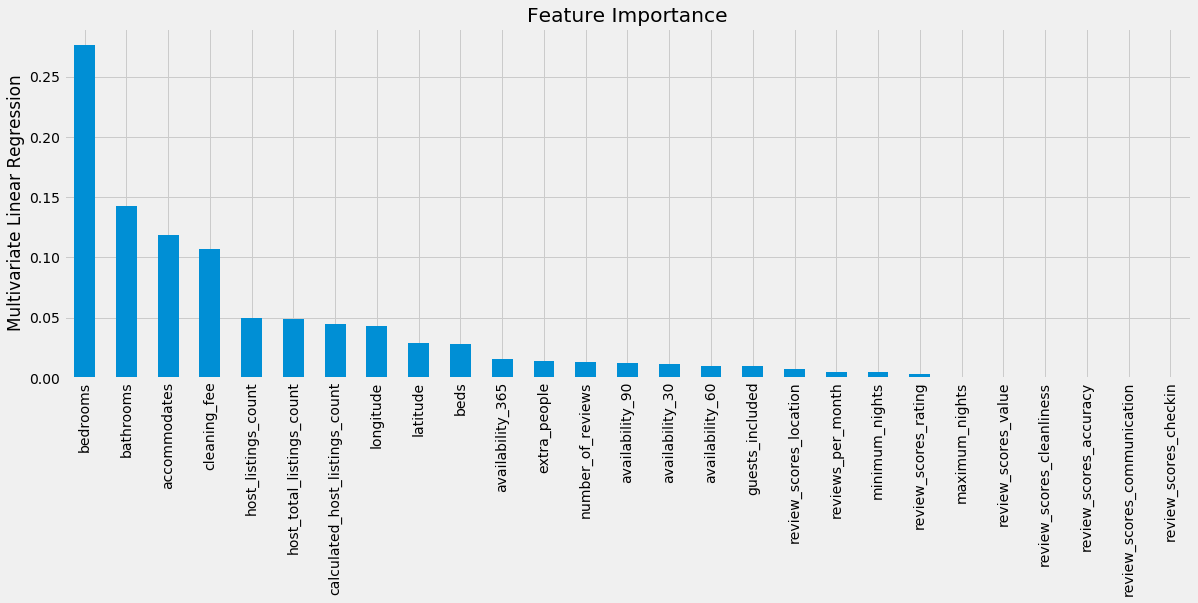

In [104]:
feature_importance = pd.Series(np.abs(model.feature_importances_))
feature_importance.index = selected_features
feature_importance.sort_values(inplace=True,ascending=False)
feature_importance.plot.bar(figsize=(18,6))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')

## XGBoost

### 1. Train model

In [105]:
# Choose a class of model
import xgboost 
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

### 2. Result

In [106]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

### Prediction

In [107]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [101.131165, 57.16507, 33.927784, 57.62965, 29.803614]
Train true label:  [75.0, 35.0, 30.0, 36.0, 38.0]

Test prediction:  [170.60449, 336.30234, 86.59403, 71.12959, 33.027203]
Test true label:  [140.0, 250.0, 75.0, 37.0, 29.0]

Average house price:  80.0


### Model Evaluation

In [108]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.6332
Test R-squared: 0.5981


In [109]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 3837.2024402023317
linear train rmse: 61.945156713033924

linear test mse: 4102.23919631934
linear test rmse: 64.0487251732565


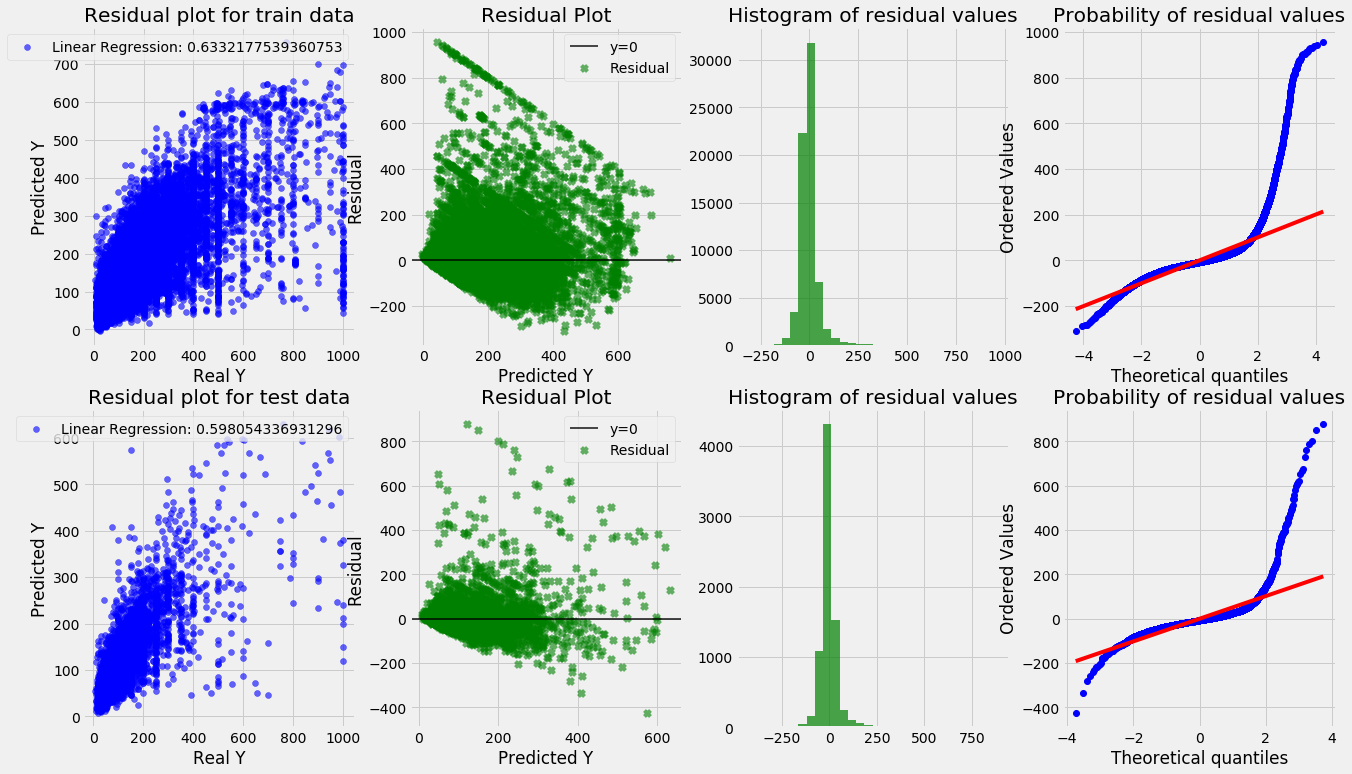

In [110]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

In [112]:
# Get numerical feature importance
feature_importance = list(np.abs(model.feature_importances_))
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

bedrooms                                           Importance: 0.20000000298023224
accommodates                                       Importance: 0.1599999964237213
bathrooms                                          Importance: 0.10999999940395355
host_total_listings_count                          Importance: 0.07999999821186066
cleaning_fee                                       Importance: 0.05999999865889549
review_scores_location                             Importance: 0.05999999865889549
number_of_reviews                                  Importance: 0.05000000074505806
availability_60                                    Importance: 0.03999999910593033
longitude                                          Importance: 0.029999999329447746
availability_30                                    Importance: 0.029999999329447746
calculated_host_listings_count                     Importance: 0.029999999329447746
latitude                                           Importance: 0.029999999329447746
a

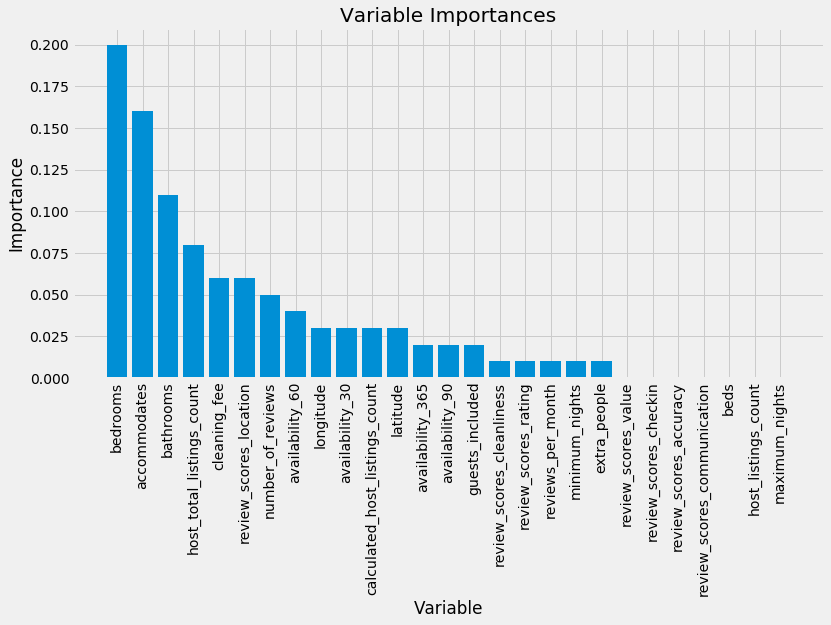

In [113]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [114]:
# Cross Validation
model = XGBRegressor(n_estimators = 100,learning_rate=0.05, max_depth=3,max_features=3,min_samples_leaf=20,min_samples_split=2)
cv_scores = cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(model,X_train, y_train,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [0.58486231 0.57207989 0.58526391 0.57546407 0.59741217 0.57784524
 0.59544594 0.5867097  0.59177612 0.59084001]
Average R2 score:  0.59
Average RMSE score:  65.82


In [115]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [5, 20],
    'min_samples_leaf': [3, 20],
    'min_samples_split': [8, 20],
    'n_estimators': [5, 50]
}
# Create a based model
model = XGBRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, y_train)  
grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.1min finished


{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

## Model

1. Train the model
2. Result
3. Prediction
4. Evaluate the model
  + MSE and RMSE
  + Visualize the predicted output and true label
  + Distribution of the errors
5. Feature importance